## Метод главных компонент (PCA)

In [1]:
import numpy as np

In [2]:
SIZE = 100_000  # размер выборки
# это все признаки
x = np.random.normal(SIZE)
y = np.random.normal(SIZE)

In [3]:
x, y

(99999.6901401119, 99999.54048513962)

In [4]:
# это тоже признак
z = (x+y) / 2

In [5]:
z

99999.61531262576

In [6]:
F = np.vstack([x, y, z])
FF = 1 / SIZE * F@F.T  # @ - перемножение матриц вместо np.dot()

In [7]:
FF

array([[99999.38028118, 99999.23062668, 99999.30545393],
       [99999.23062668, 99999.08097239, 99999.15579953],
       [99999.30545393, 99999.15579953, 99999.23062673]])

In [8]:
L, W = np.linalg.eig(FF)

In [9]:
L  # собственный числа

array([ 2.99997692e+05, -2.48403541e-11,  8.03724487e-12])

In [10]:
W  # собственный вектор

array([[ 0.5773507 , -0.67629863, -0.35231619],
       [ 0.57734984, -0.0580385 ,  0.81404945],
       [ 0.57735027,  0.73433759, -0.46173238]])

In [11]:
W = sorted(zip(L, W.T), key=lambda x: x[0], reverse=True)

In [12]:
W

[(299997.69188030617, array([0.5773507 , 0.57734984, 0.57735027])),
 (8.03724486878096e-12, array([-0.35231619,  0.81404945, -0.46173238])),
 (-2.4840354091211512e-11, array([-0.67629863, -0.0580385 ,  0.73433759]))]

## Feature_extraction

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
'''names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)'''

"names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']\ndataframe = pd.read_csv('https://raw.githubusercontent.com/flaymax/tmp/master/pima-indians-diabetes.csv', names=names)"

In [16]:
dataframe

NameError: name 'dataframe' is not defined

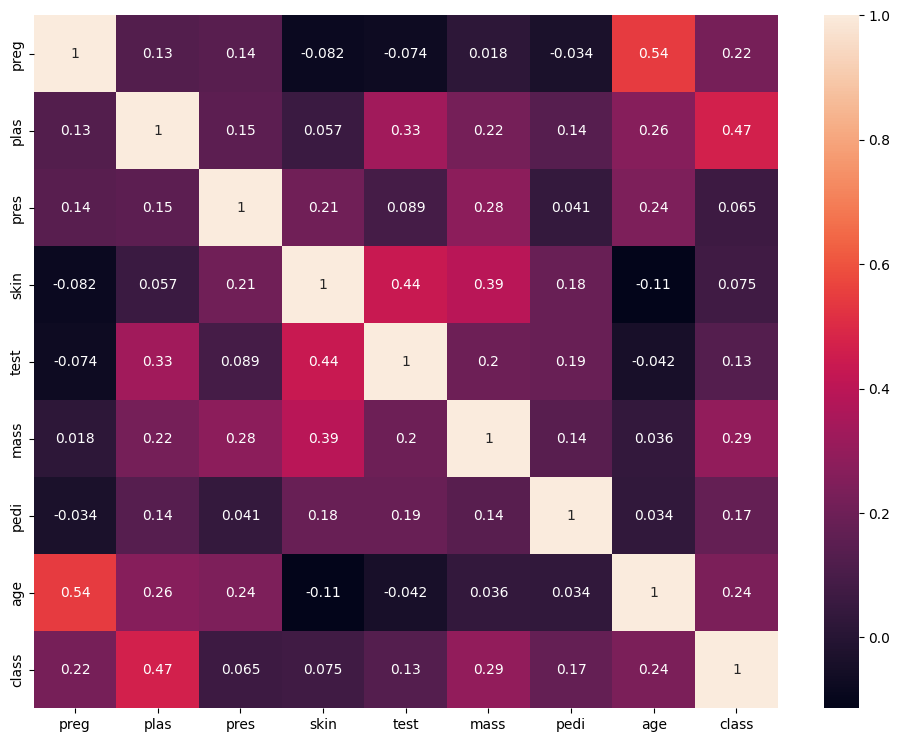

In [ ]:
corr = dataframe.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)
plt.show()

## mutual_info_score

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
for col in names[:-1]:
    print('class -', col, mutual_info_score(dataframe[col], dataframe['class']))

class - preg 0.04285406127277179
class - plas 0.21085615360952042
class - pres 0.04111026790882456
class - skin 0.05660541023678324
class - test 0.19206729136136813
class - mass 0.2383113668395052
class - pedi 0.45118180206849473
class - age 0.09769272275595872


c:\interpreter\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\interpreter\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


## RandomForestClassifier

In [ ]:
X = dataframe.iloc[:,:8]
Y = dataframe.iloc[:,8]
# извлечение признаков
model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

RandomForestClassifier(random_state=1)

In [ ]:
imps = pd.Series(model.feature_importances_, index=names[:-1])
imps.sort_values(ascending=False)

plas    0.248506
mass    0.171192
age     0.139239
pedi    0.124693
pres    0.086612
preg    0.084864
test    0.076433
skin    0.068461
dtype: float64

## permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(model, X, Y)
res

{'importances_mean': array([0.04114583, 0.18880208, 0.02942708, 0.02734375, 0.0265625 ,
        0.10729167, 0.06536458, 0.08776042]),
 'importances_std': array([0.00549966, 0.01161704, 0.00104167, 0.00546255, 0.0032526 ,
        0.00677083, 0.01042968, 0.01037099]),
 'importances': array([[0.03515625, 0.04557292, 0.04947917, 0.0390625 , 0.03645833],
        [0.18619792, 0.171875  , 0.20182292, 0.20182292, 0.18229167],
        [0.02994792, 0.02864583, 0.02864583, 0.02864583, 0.03125   ],
        [0.03645833, 0.02604167, 0.02994792, 0.0234375 , 0.02083333],
        [0.0234375 , 0.02994792, 0.02994792, 0.02213542, 0.02734375],
        [0.11848958, 0.109375  , 0.10026042, 0.10026042, 0.10807292],
        [0.08333333, 0.06510417, 0.05078125, 0.06510417, 0.0625    ],
        [0.07421875, 0.08333333, 0.10286458, 0.09635417, 0.08203125]])}

In [ ]:
imps = pd.Series(res['importances_mean'], index=names[:-1])
imps.sort_values(ascending=False)

plas    0.188802
mass    0.107292
age     0.087760
pedi    0.065365
preg    0.041146
pres    0.029427
skin    0.027344
test    0.026562
dtype: float64

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [18]:
X, y = datasets.load_wine(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
X_train.shape

(89, 13)

In [19]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.6853932584269663

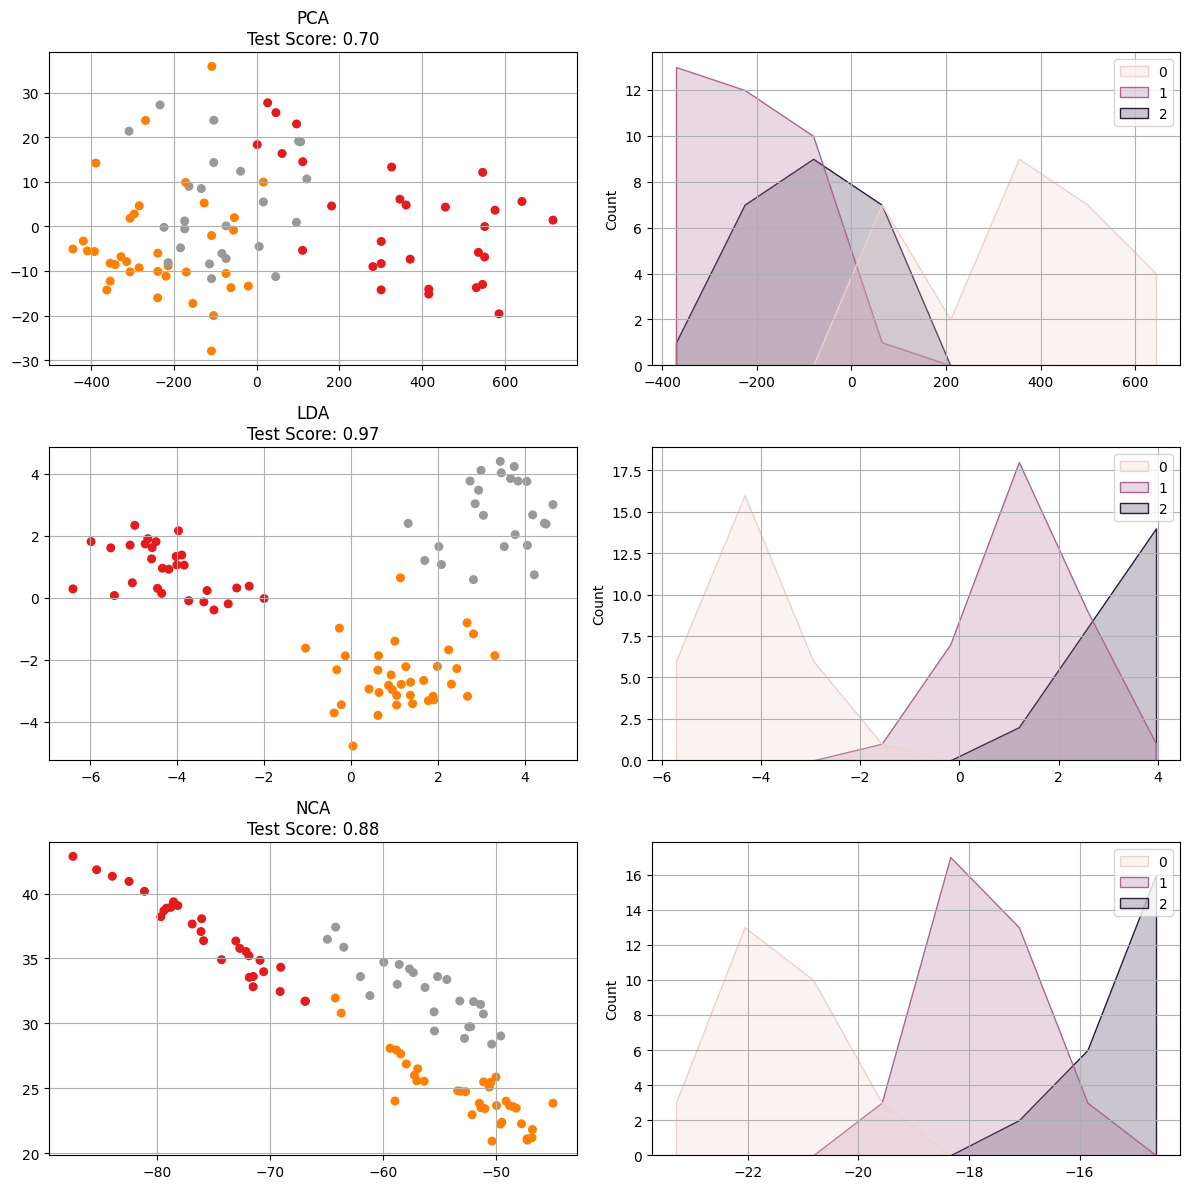

In [34]:
dim_reduction_methods = [
        ('PCA', PCA(n_components=1), PCA(n_components=2)),
        ('LDA', LinearDiscriminantAnalysis(n_components=1), LinearDiscriminantAnalysis(n_components=2)),
        ('NCA', NeighborhoodComponentsAnalysis(n_components=1), NeighborhoodComponentsAnalysis(n_components=2))
    ]
    
# Создание фигуры и сетки подграфиков
fig, axa = plt.subplots(3, 2, figsize=(12, 12))

# Цикл по каждому методу снижения размерности
for i, (name, model1, model2) in enumerate(dim_reduction_methods):
    # Обучение моделей на тренировочных данных
    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)

    # Преобразование данных
    X_tr1 = model1.transform(X_train)
    X_tr2 = model2.transform(X_train)

    # Построение scatter plot для данных, уменьшенных до 2 компонент
    axa[i, 0].scatter(X_tr2[:, 0], X_tr2[:, 1], c=y_train, s=30, cmap='Set1')
    axa[i, 0].set_title(f"{name}")
    axa[i, 0].grid()

    # Построение гистограммы для данных, уменьшенных до 1 компоненты
    sns.histplot(x=X_tr1.ravel(), hue=y_train, ax=axa[i, 1], element="poly")
    axa[i, 1].grid()

    # Создание и обучение классификатора KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_tr2, y_train)

    # Оценка точности классификатора на тестовых данных
    test_score = knn.score(model2.transform(X_test), y_test)
    axa[i, 0].set_title(f"{name}\nTest Score: {test_score:.2f}")

# Отображение всех графиков
plt.tight_layout()
plt.show()

## Функции которые оставляют нужное количество признаков

In [40]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

selector = SelectKBest(f_classif, k=5)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_t.shape

CPU times: total: 0 ns
Wall time: 1 ms


(89, 5)

In [36]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.6853932584269663

## Функции которые оставляют нужный процент признаков

In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(chi2, percentile=80)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(89, 10)

In [ ]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn.score(X_t, y_test)

0.7528089887640449